# 1.SWAP dynamics for zero detuning and large detuning

- Zero detuning:We comapre the DDE and WW solutions with exact TC model (Two qubit with one mode)
- Large detuning: We comapre the DDE and WW solutions with approximation TC model (Two qubit with infinite modes) via SW perturbation
  
**Conclusion**:
- The DDE provides a good approximation to the WW model at all coupling strengths (maily refers weak coupling), and in the weak-coupling regime($g \ll FSR$) it can reproduce the dynamics of the Rabi model. 
- In the large-detuning regime, where the Rabi model itself is no longer valid, the DDE can still reproduce the second-order perturbative results of the Tavis–Cummings (TC) model.


Finished TC sim
Finished TC sim


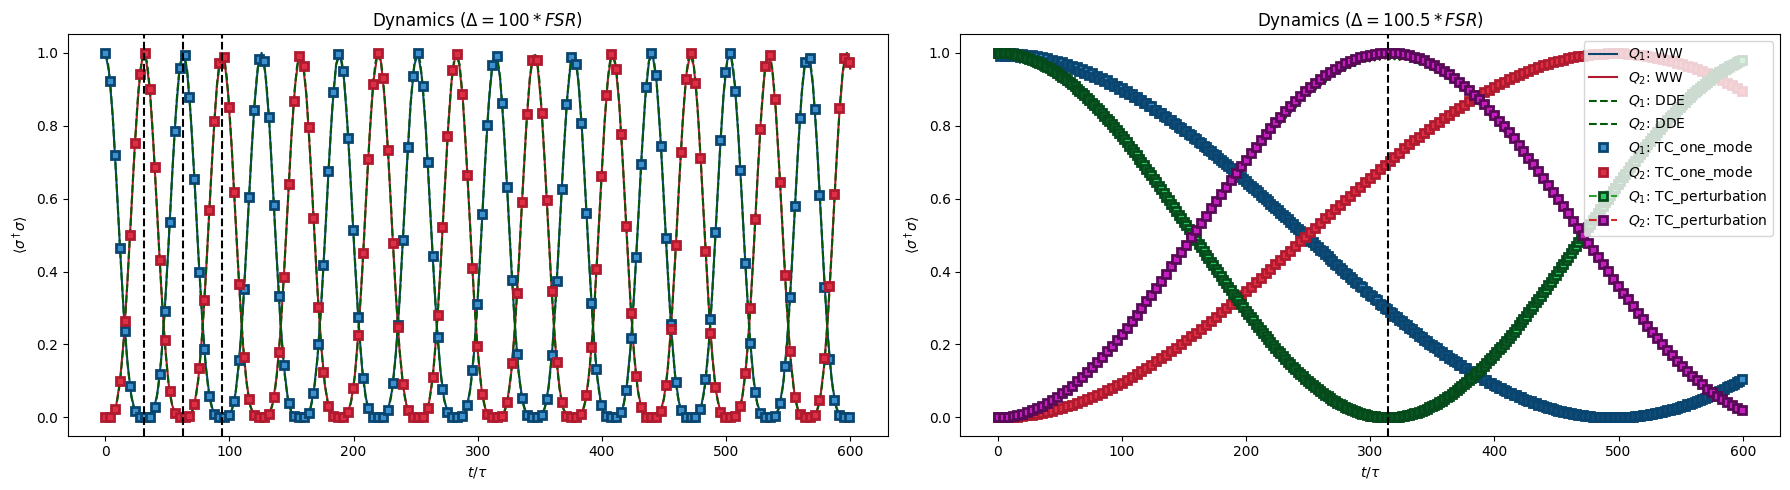

In [5]:
from expt_sets import expt_001_dynamics

expt_001_dynamics(
    Delta=100.5, gamma=0.01, tau=1, T=600, dt_max=0.01, n_steps=201, n_modes=100
)

# 2.SW Perturbation Convergence
We can use the perturbation theory to calculate the effective Hamiltonian,
\begin{align}
    H_{eff}^{(P)} = -\sum_{i,k} \frac{|g_{i,k}|^2}{\delta_k}\sigma_i^\dagger \sigma_i -\sum_k (\frac{g_{1,k}g_{2,k}}{\delta_k}\sigma_1^\dagger \sigma_2 +H.C) \notag
\end{align}
where
\begin{align}
    \sum_k^\infty (\frac{g_{1,k}g_{2,k}}{\delta_k}) = \frac{\pi  g^2} {FSR}  \csc(\frac{\pi  \delta}  {FSR}) \notag
\end{align}
So here I want test how the convergence of perturbation theory.

**Conclusion**:
- In the ideal limit, where the qubit frequency is sufficiently large and the number of waveguide modes coupled to the qubit is much enough, the perturbative result converges to a $csc$ function.


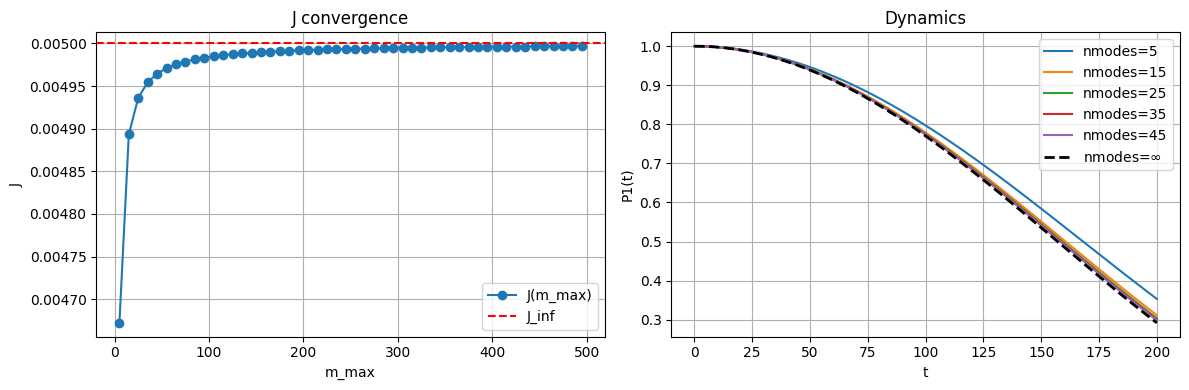

In [2]:
from expt_sets import expt_002_perturbation_convergence
import numpy as np

expt_002_perturbation_convergence(
    Delta=0.5 * np.pi,
    gamma=0.01,
    FSR=np.pi,
    m_list=np.arange(5, 500, 10),
    sample_m=[5, 15, 25, 35, 45],
    T=200,
    n_steps=2001,
)

# 3. Swap speed and Fidelity
## 3.1 Study the speed and fidelity
Above, we found that two qubits can be passively swapped. 
Here, we will test the speed and fidelity of the swap.

**Conclusion** : 
- Because our DDE dynamics is piecewise-defined, if the Rabi frequency is not an integer multiple of τ, the position of the maximum fidelity in the DDE model will be mismatched and shifted relative to that in the Rabi model. This is why the speed follows the Rabi-frequency trend but exhibits oscillatory fluctuations, and also why the fidelity shows corresponding up-and-down variations.

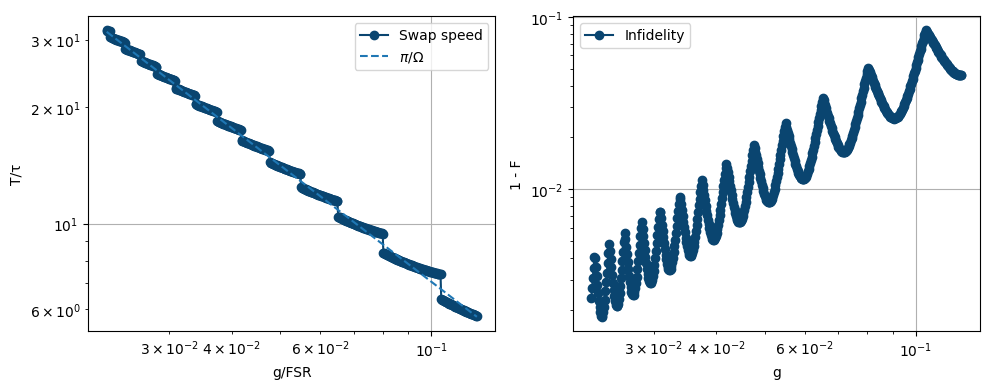

In [5]:
from expt_sets import expt_003_swapspeed
import numpy as np

gamma_list = np.logspace(np.log10(0.01), np.log10(0.3), 500)
t_peaks, F_list = expt_003_swapspeed(
    Delta=0,
    gamma_list=gamma_list,
)

## 3.2 Study the speed and fidelity for different peak
**Conclusion**: 
- There are not obviously different. So I think it is enough to only consider the first peak.

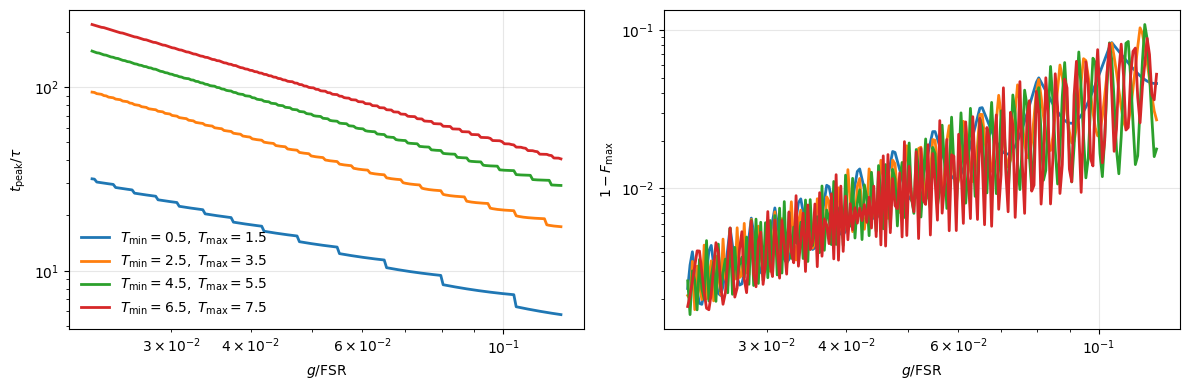

In [ ]:
from expt_sets import expt_005_compare_peaks
import numpy as np

expt_005_compare_peaks(
    Delta=0,
    gamma_list=np.logspace(np.log10(0.01), np.log10(0.3), 200),
    T_min_max_list=[
        (0.5, 1.5),
        (2.5, 3.5),
        (4.5, 5.5),
        (6.5, 7.5),
    ],
)


## 3.3 Study the speed and fidelity for different optimization method
**Conclusion**: 
- Binary and minize_scalar Perform better.


Running optimizer: binary

Running optimizer: minimize

Running optimizer: scalar


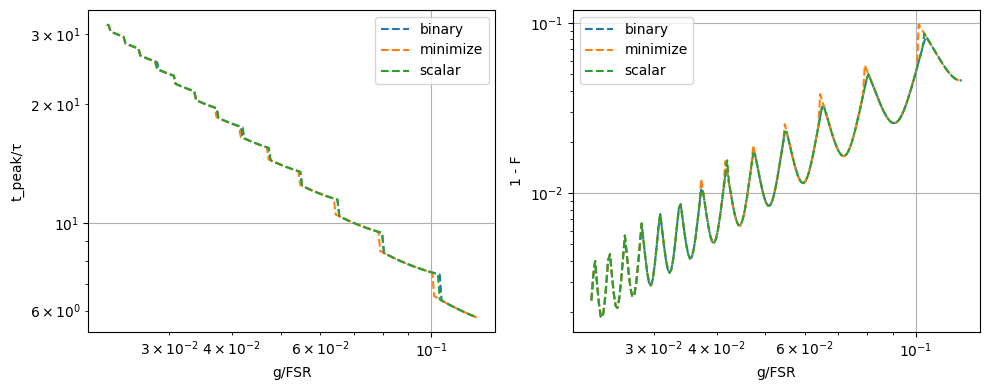

In [8]:
from expt_sets import expt_004_opti_compare
import numpy as np

gamma_list = np.logspace(np.log10(0.01), np.log10(0.3), 200)
expt_004_opti_compare(
    Delta=0,
    gamma_list=gamma_list,
)

# 4. DDE with time-depending coupling

We need to test the performance of the DDE under time-dependent couplings and to compare quantum state transfer driven by time-dependent pulse control with passive state transfer based on constant-coupling swap schemes. Therefore, it is necessary to develop a DDE integrator that supports time-dependent couplings.
**Conclusion**:
- Test the stirap protcol with $g_1 = g_0 \sin (\pi t/T ), g_2 = g_0 \cos (\pi t/T )$

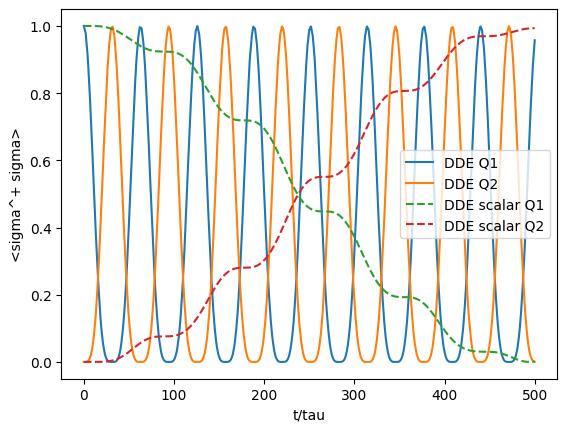

np.float64(0.9933329501518326)

In [7]:
from expt_sets import expt_006_stirap

expt_006_stirap(T=500.0, gamma=0.01, dt_max=0.01, phi=0)

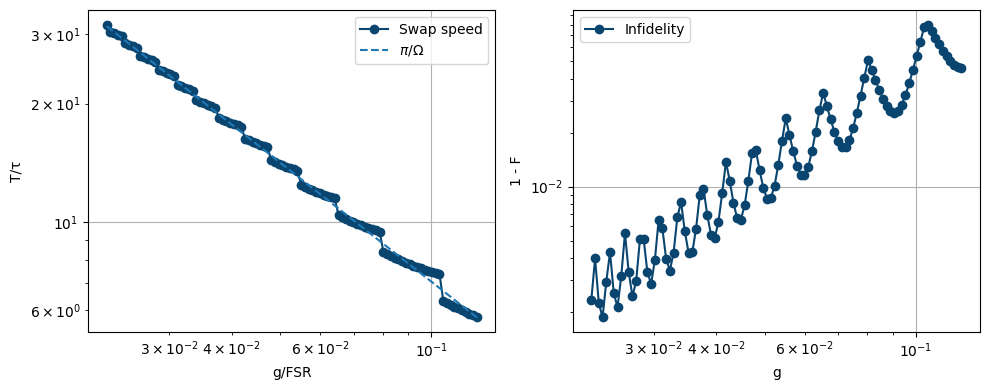

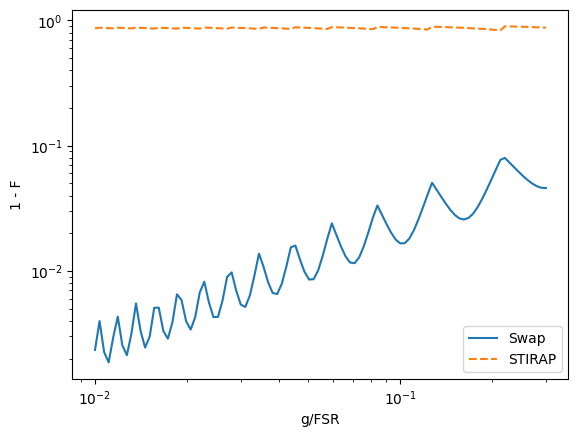

In [ ]:
from expt_sets import expt_007_stira_and_swap
import numpy as np

gamma_list = np.logspace(np.log10(0.01), np.log10(0.3), 100)
expt_007_stira_and_swap(gamma_list=gamma_list, phi=0.0, tau=1.0, dt_max=0.01)

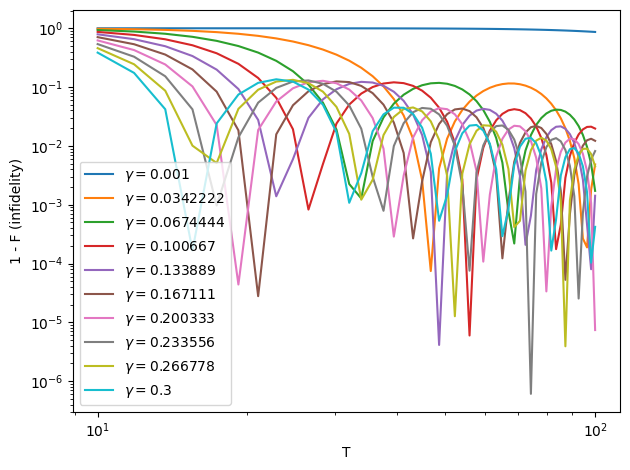

In [5]:
from expt_sets import expt_008_stirap_T_scan
import numpy as np

gamma_list = np.linspace(0.001, 0.3, 10)
T_list = np.linspace(10, 100, 50)
expt_008_stirap_T_scan(gamma_list, T_list, phi=0.0, tau=1.0, dt_max=0.01)